In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/Kaggle/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df['TotalCharges'].dtype

dtype('float64')

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.replace(" ",np.nan,inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
binary_cols=['Partner','Dependents','PhoneService','TechSupport','StreamingMovies','PaperlessBilling']
categorical_cols = ['gender','InternetService','Contract','PaymentMethod','MultipleLines','OnlineBackup','OnlineSecurity','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies']
numeric_cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

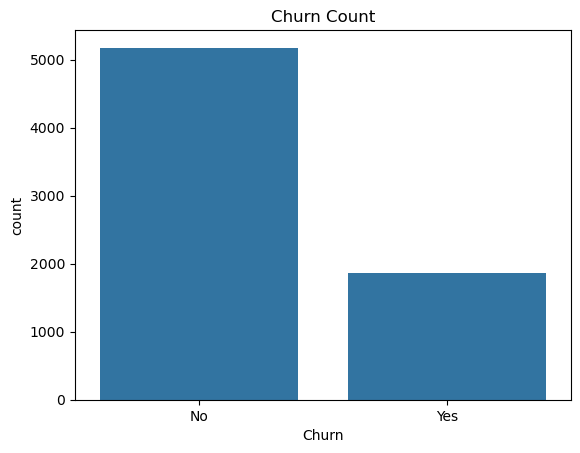

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data=df)
plt.title('Churn Count')
plt.show()

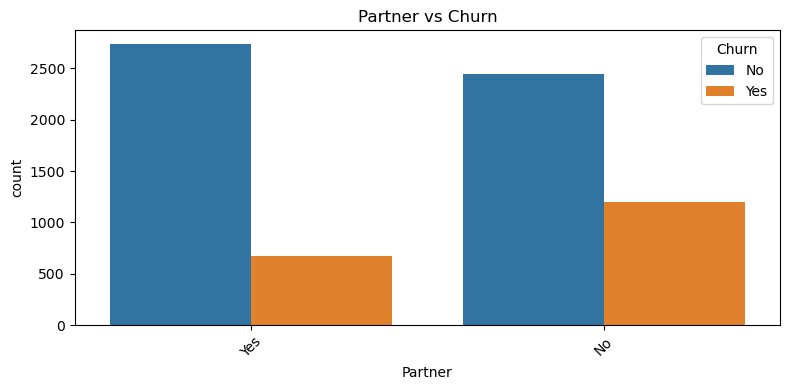

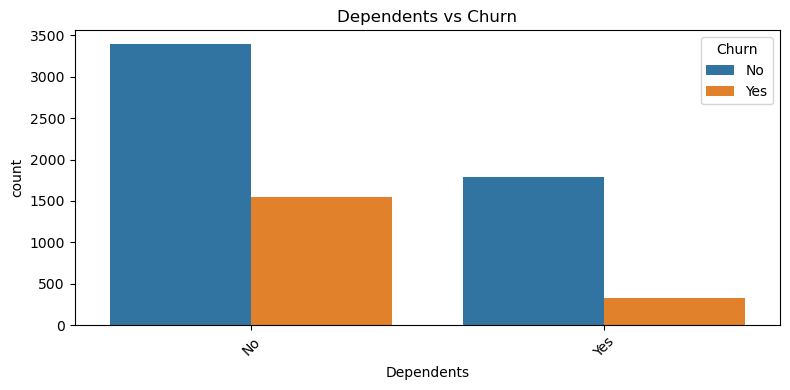

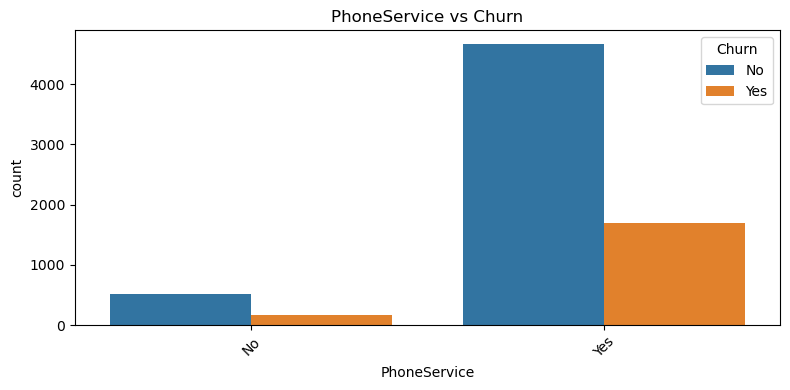

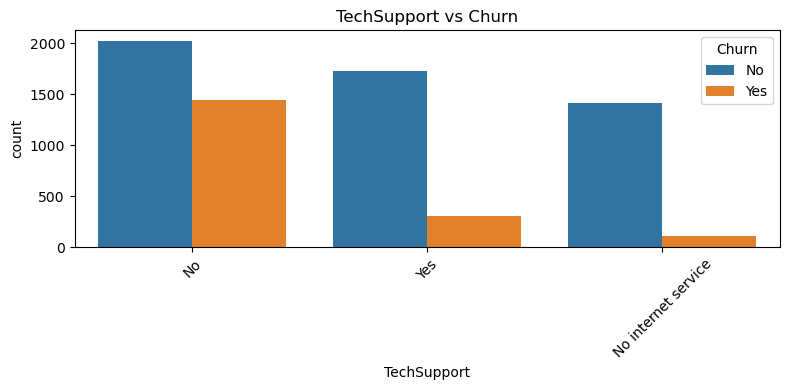

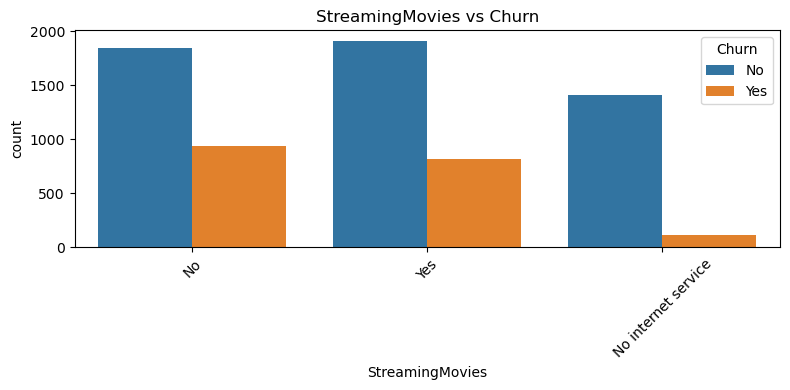

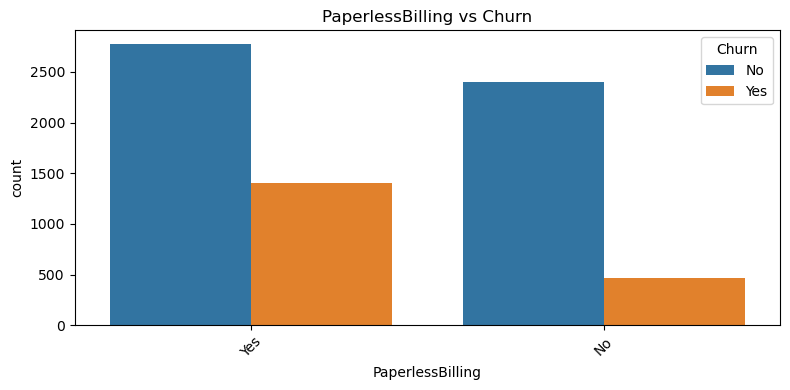

In [14]:
for col in binary_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=df,hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

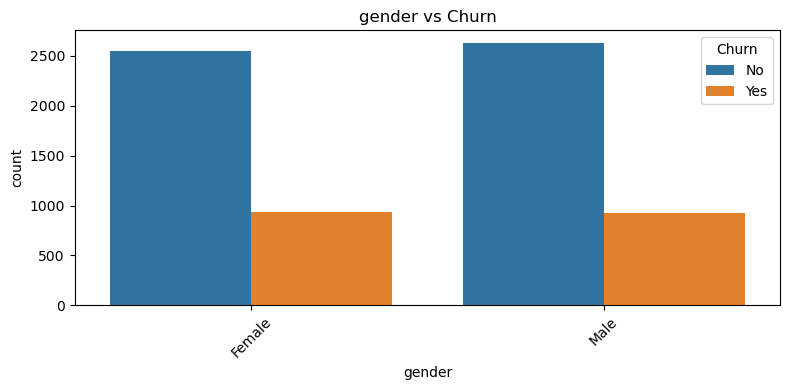

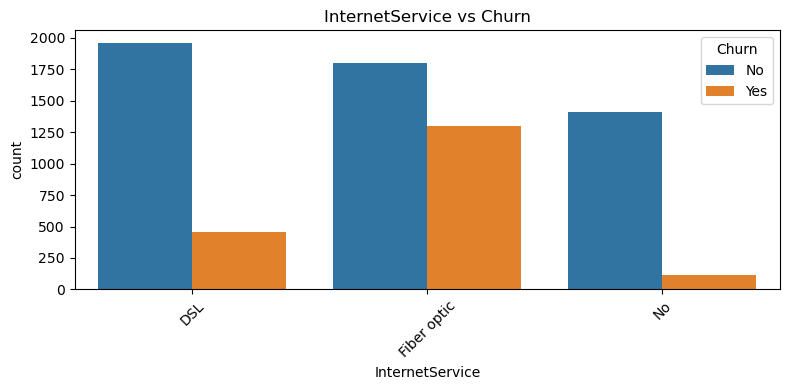

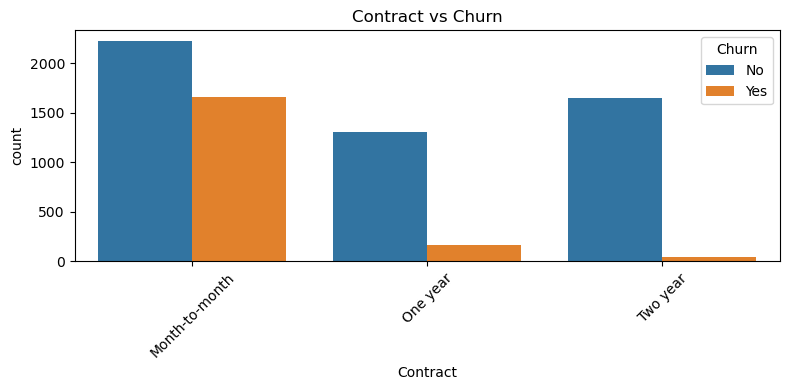

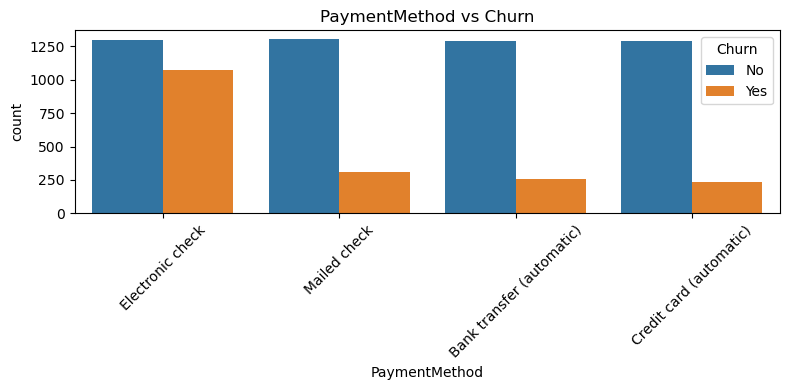

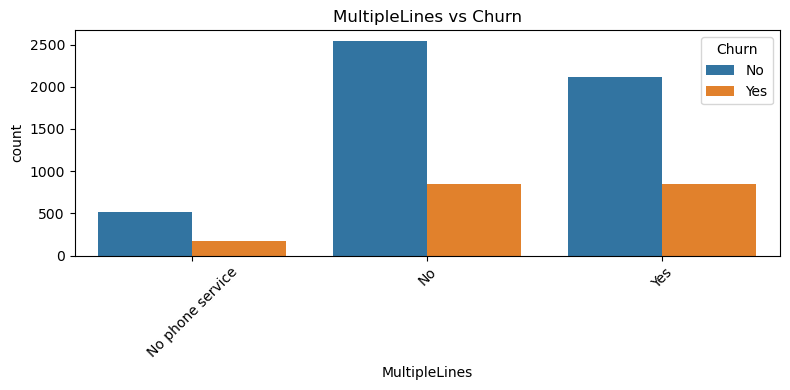

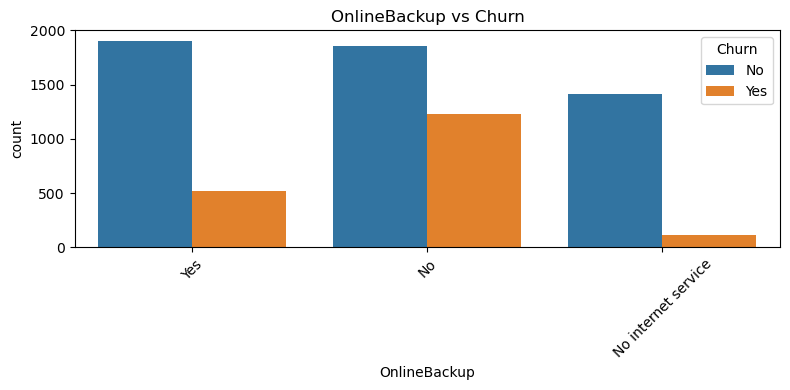

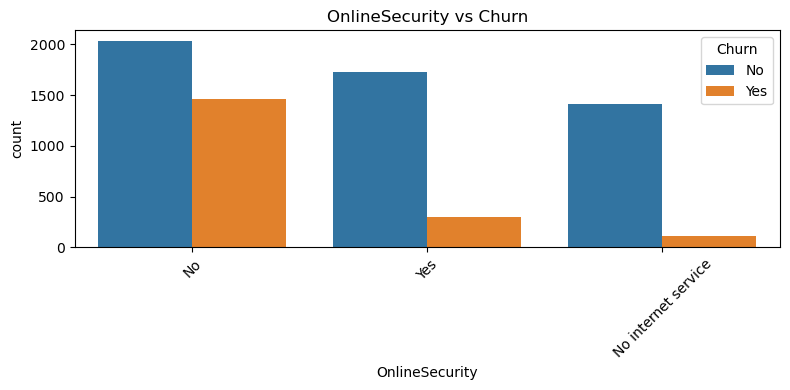

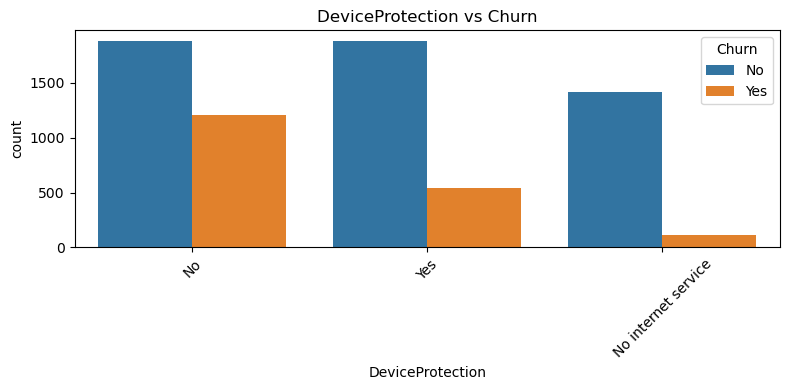

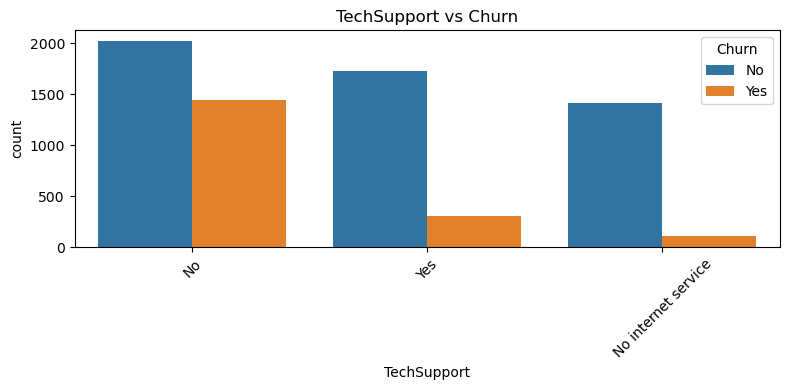

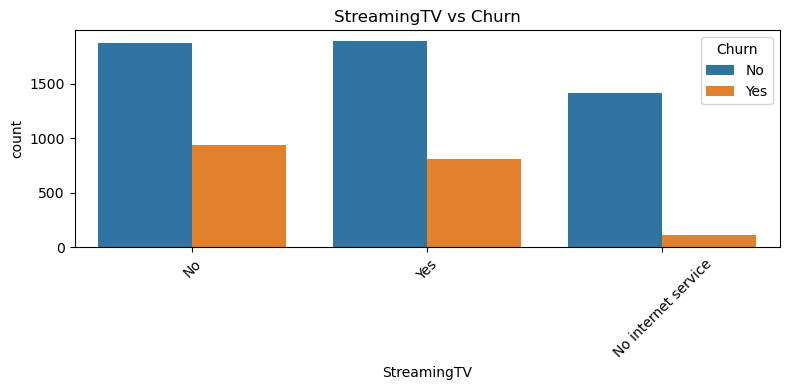

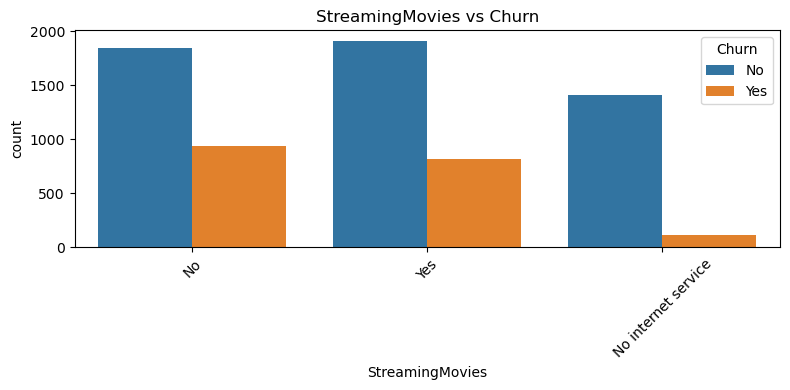

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data=df,hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

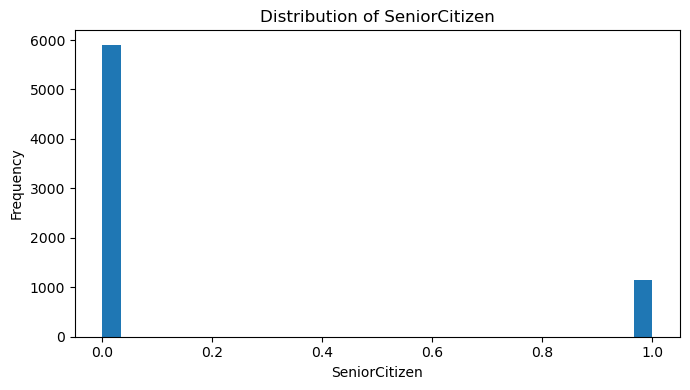

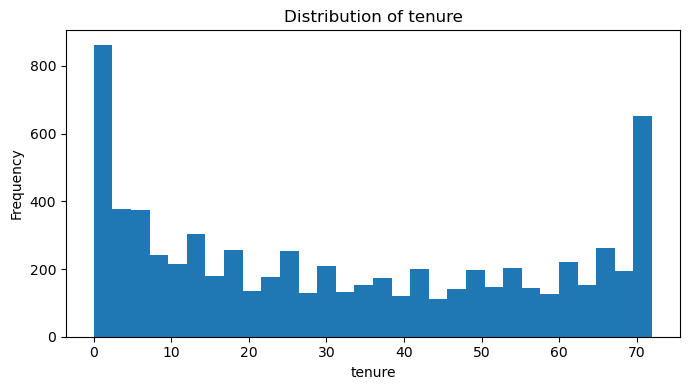

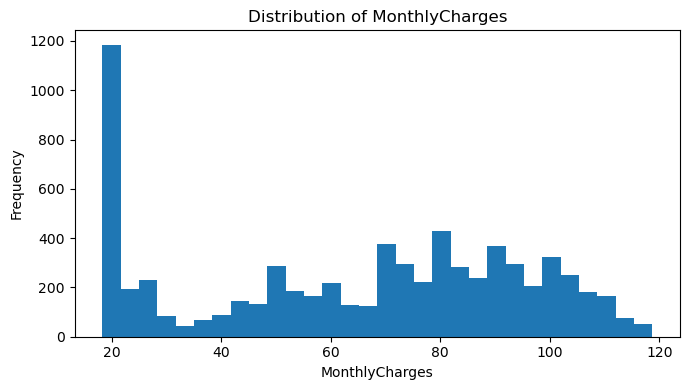

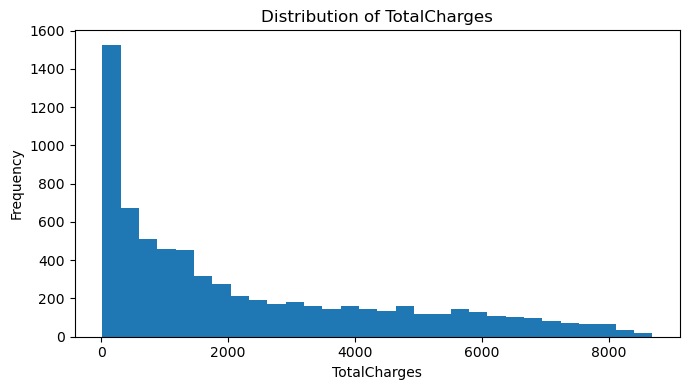

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col],bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

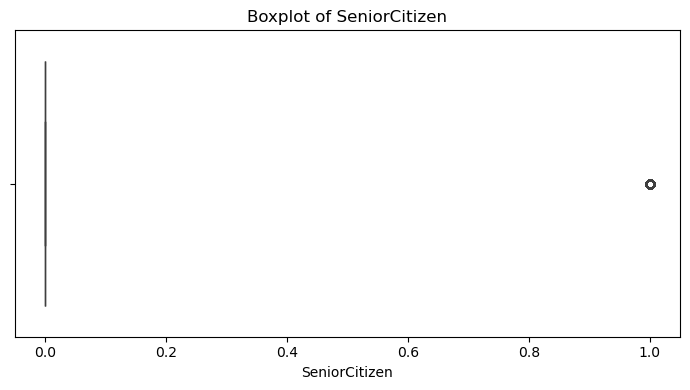

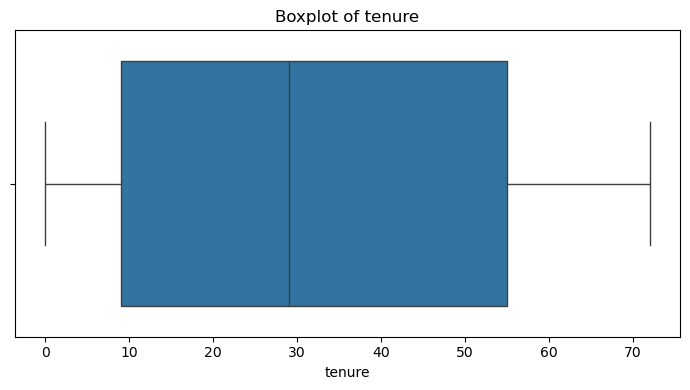

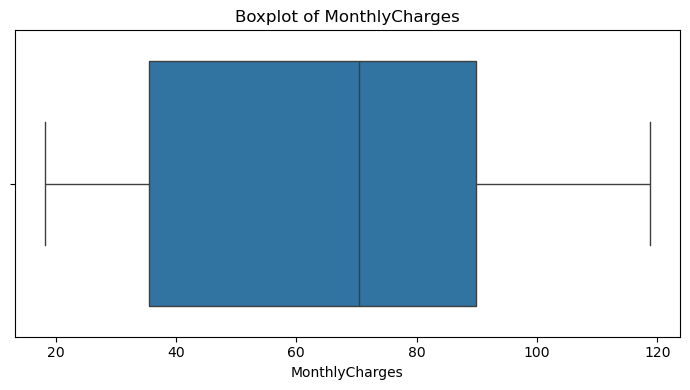

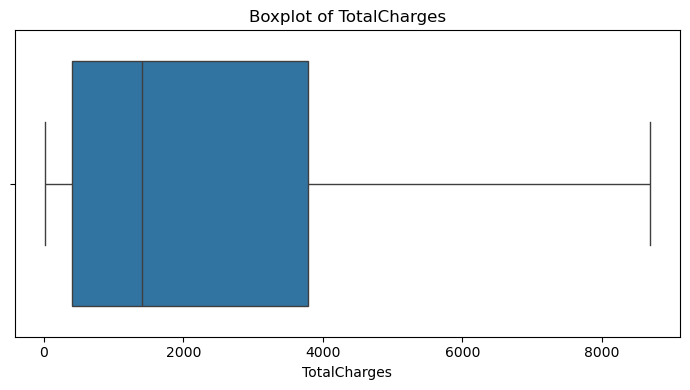

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

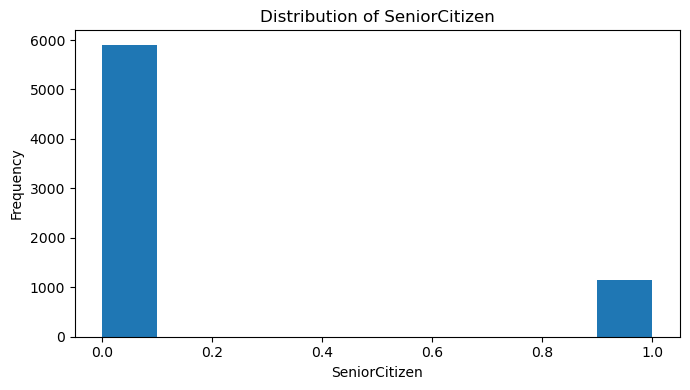

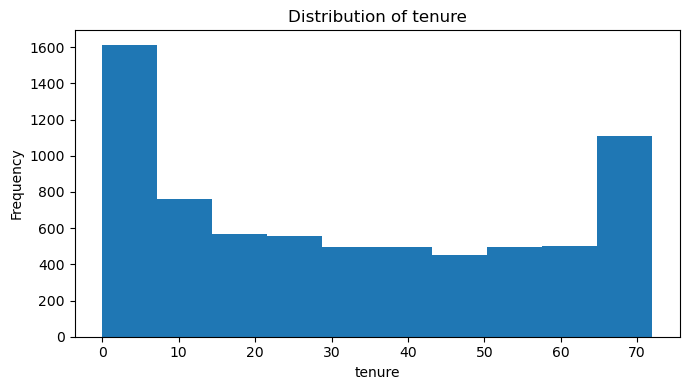

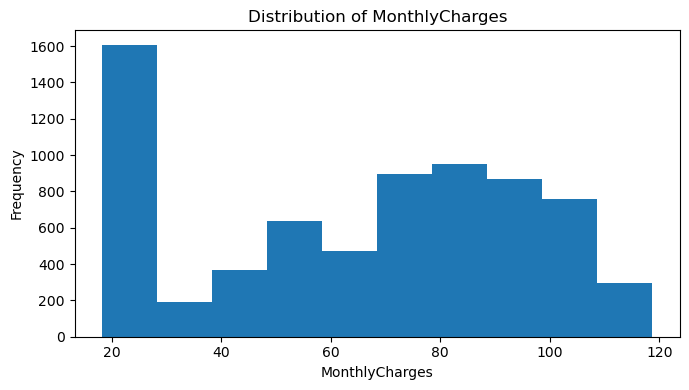

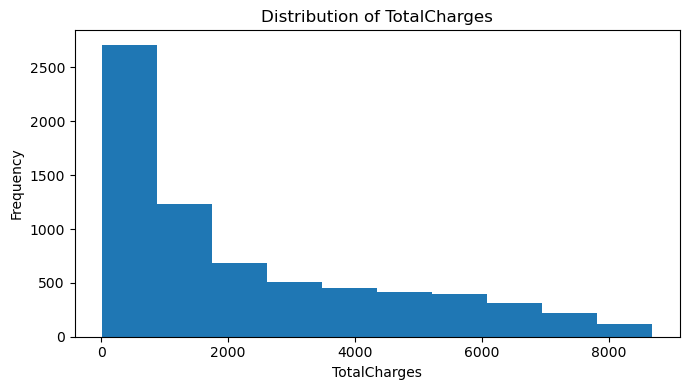

In [18]:
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    plt.hist(df[col],)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

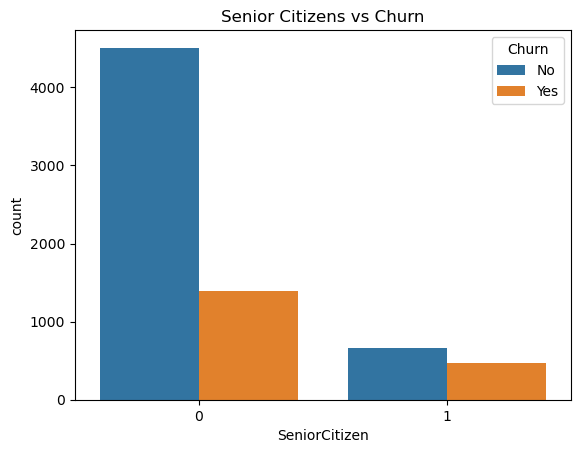

In [19]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title('Senior Citizens vs Churn')
plt.show()

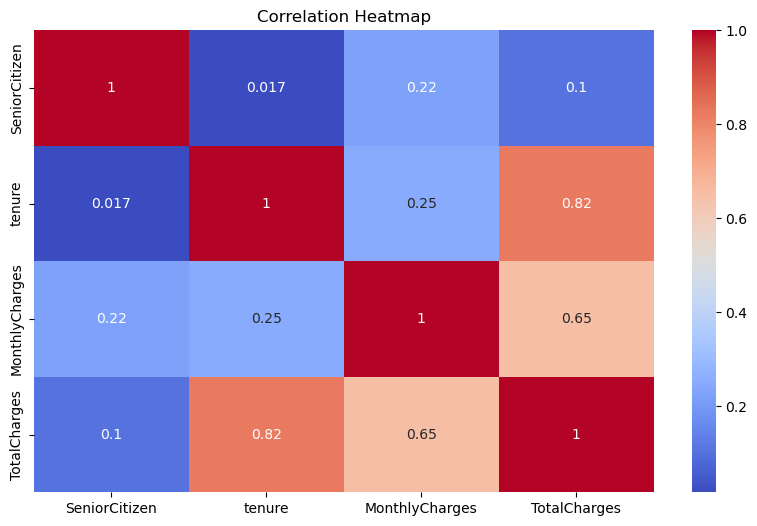

In [20]:
num_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
for i in range(1,2):
    print(f"Binary Columns: {binary_cols} \n \n Categorical Columns: {categorical_cols} \n  \n Numerical Columns: {numeric_cols}")

Binary Columns: ['Partner', 'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'PaperlessBilling'] 
 
 Categorical Columns: ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] 
  
 Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [22]:
X=df.drop('Churn',axis=1)
y = df['Churn']

In [23]:
X1 = df.drop('Churn',axis=1)
for i in binary_cols:
    X1[i] = X[i].map({'Yes':1,'No':0})

In [24]:
X1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,0.0,No,0.0,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,0.0,No,0.0,One year,0,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,0.0,No,0.0,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,1.0,No,0.0,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,0.0,No,0.0,Month-to-month,1,Electronic check,70.70,151.65


In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer

In [26]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
], remainder='drop')
le = LabelEncoder()

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=42)

In [28]:
X_train_trans = preprocess.fit_transform(X_train)
X_test_trans = preprocess.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [30]:
y_test.value_counts()

Churn
No     1036
Yes     373
Name: count, dtype: int64

In [32]:
y_train.value_counts()

Churn
No     4138
Yes    1496
Name: count, dtype: int64

In [33]:
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

In [34]:
model.fit(X_train_trans,y_train_trans)

RandomForestClassifier()

In [35]:
y_pred_trans = model.predict(X_test_trans)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f"Accuracy Score : {accuracy_score(y_test_trans,y_pred_trans)}")

Accuracy Score : 0.7963094393186657


In [36]:
print(f"Confusion Matrix : \n {confusion_matrix(y_test_trans,y_pred_trans)}")

Confusion Matrix : 
 [[937  99]
 [188 185]]


In [37]:
print(f"Classification Report : \n {classification_report(y_test_trans,y_pred_trans)}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.50      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409



In [38]:
from xgboost import XGBClassifier
model_new = XGBClassifier()

In [39]:
model_new.fit(X_train_trans,y_train_trans)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:
y_predict_trans = model_new.predict(X_test_trans)
print(f"Accuracy Score : {accuracy_score(y_test_trans,y_predict_trans)}")

Accuracy Score : 0.7977288857345636


In [41]:
print(f"Confusion Matrix : \n {confusion_matrix(y_test_trans,y_predict_trans)}")

Confusion Matrix : 
 [[928 108]
 [177 196]]


In [42]:
print(f"Classification Report : \n {classification_report(y_test_trans,y_pred_trans)}")

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.50      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409

